# **Import Libraries and modules**

###Import Keras libraries

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


###Importing other libraries needed

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

###Print the image dimensions and plot the image

(60000, 28, 28)


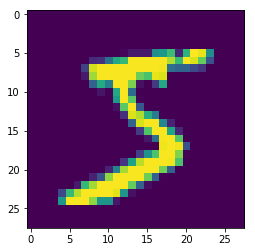

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

###reshape the training and testing datasets

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

###Convert integer type data to float32 type and restrict data in betwwen 0-255 to 0-1 for both test and training data

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

###Display first 10 elements in the trainign dataset

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#The DNN
### The network is designed with dropouts, one maxpooling and 8 convolution layers. 
### Changes:
* Tweak in the architecture.
* Added batchnormalization.
* Added more epochs.

### Observations

   1. Significant increase in the accuracy
   2. The val accuracy is greater than test accuracy. This is because of the dropouts added.
   3. Reduced number of parameters.
   4. Epoch time is increased.


In [17]:
from keras.layers import Activation
from keras.layers import Dropout
from keras.layers import MaxPool2D
from keras.layers import BatchNormalization

model = Sequential()
 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #Will return 26x26x32
model.add(BatchNormalization()) #--3

model.add(Convolution2D(16, 3, 3, activation='relu')) #24x24x16
model.add(BatchNormalization()) #--3


model.add(Convolution2D(8, 3, 3, activation='relu')) #9x9x18
model.add(BatchNormalization()) #--3
model.add(Dropout(0.2))

model.add(MaxPool2D(2,2)) #returns 11x11x64  --- 11x11x64

model.add(Convolution2D(16, 3, 3, activation='relu')) #22x22x8
model.add(BatchNormalization()) #--3
model.add(Dropout(0.2))

model.add(Convolution2D(8, 3, 3, activation='relu')) #9x9x18
model.add(BatchNormalization()) #--3
model.add(Dropout(0.2))
model.add(Convolution2D(8, 3, 3, activation = 'relu')) #7x7x8
model.add(BatchNormalization()) #--3
model.add(Dropout(0.2))
model.add(Convolution2D(12,1,1, activation='relu')) #7x7x12
model.add(BatchNormalization()) #--3 

model.add(Convolution2D(10, 5, 5))  #returns 1x1x10



model.add(Flatten())  #Runs flatten operation on the image matrix 
model.add(Activation('softmax')) 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launc

### Outputs the summary of our model

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 22, 22, 8)         1160      
_________________________________________________________________
batch_normalization_15 (Batc (None, 22, 22, 8)         32        
_________________________________________________________________
dropout_7 (Dropout)          (None, 22, 22, 8)         0         
__________

### Compiles the model and create a checkpoint callback which remembers the best accuracy achived in the training phase. 

In [0]:
from keras.callbacks import ModelCheckpoint
model.compile(loss='categorical_crossentropy',optimizer='adam',
             metrics=['accuracy'])
checkpoint = ModelCheckpoint('model.best-accuracy.hdfs', save_best_only=True,monitor='val_acc')
callback_list=[checkpoint]

### training the model and alsoo validate the model at each epoch against test data.

In [20]:
model.fit(X_train, Y_train, batch_size=50, 
          nb_epoch=50 , verbose=1, callbacks=callback_list, validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 52s 868us/step - loss: 0.3579 - acc: 0.8837 - val_loss: 0.0977 - val_acc: 0.9692
Epoch 2/50
60000/60000 [==============================] - 47s 781us/step - loss: 0.1016 - acc: 0.9681 - val_loss: 0.0524 - val_acc: 0.9837
Epoch 3/50
60000/60000 [==============================] - 45s 758us/step - loss: 0.0766 - acc: 0.9766 - val_loss: 0.0497 - val_acc: 0.9843
Epoch 4/50
60000/60000 [==============================] - 46s 766us/step - loss: 0.0678 - acc: 0.9785 - val_loss: 0.0431 - val_acc: 0.9870
Epoch 5/50
60000/60000 [==============================] - 45s 753us/step - loss: 0.0604 - acc: 0.9803 - val_loss: 0.0400 - val_acc: 0.9878
Epoch 6/50
60000/60000 [==============================] - 46s 760us/step - loss: 0.0553 - acc: 0.9828 - val_loss: 0.0644 - val_acc: 0.9817
Epoch 7/50
60000/60000 [==============================] - 46s 762us/step - loss: 0.0541 - acc: 0.9830 - val_loss: 0.

### Load the best model that was saved and evalute the model against the test data and record the score.

In [0]:
#model.load_weights('model.best-accuracy.hdfs')
from keras.models import load_model
model = load_model('model.best-accuracy.hdfs')
score = model.evaluate(X_test, Y_test, verbose=0)

###Print  the score

In [22]:
print(score)

[0.021352487925505557, 0.9937]


###predict the output on test data

In [0]:
y_pred = model.predict(X_test)

In [0]:
print(y_pred[:9])
print(y_test[:9])

[[1.7004984e-16 4.2394934e-13 1.0077082e-08 1.9282511e-09 3.8344536e-18
  2.7049047e-13 7.9659359e-26 1.0000000e+00 9.0797751e-14 1.9809816e-10]
 [5.7800492e-14 2.0917471e-10 1.0000000e+00 1.7767981e-13 7.9699321e-15
  2.4858827e-18 3.4937619e-10 1.7348225e-19 8.6142971e-15 4.4839736e-18]
 [3.7746372e-11 9.9994648e-01 7.6399948e-07 5.7735074e-09 3.1697655e-06
  1.0708524e-05 2.0119731e-07 3.8289680e-05 4.3513404e-07 4.9799587e-10]
 [9.9996245e-01 7.0947281e-21 1.4196235e-08 4.5778156e-11 3.0981429e-11
  1.1494016e-10 3.7152309e-05 1.0082404e-10 1.5377980e-08 3.9810587e-07]
 [7.9994046e-16 7.2836626e-13 5.6530534e-15 6.3369910e-15 9.9999905e-01
  1.0540357e-12 1.1658208e-09 3.5335516e-11 7.5856266e-12 9.1032439e-07]
 [5.2927492e-11 9.9996161e-01 5.1910320e-07 2.7809000e-09 2.6356281e-06
  3.4360387e-06 3.6611823e-08 3.1817694e-05 5.4086485e-08 6.1561400e-10]
 [3.3662391e-22 7.2132673e-09 1.5895441e-18 7.4105425e-16 9.9999738e-01
  3.2786107e-10 9.3392796e-19 2.2478401e-08 9.5652852e-10 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])
print(layer_dict)

{'conv2d_1': <keras.layers.convolutional.Conv2D object at 0x7f447a690a58>, 'dropout_1': <keras.layers.core.Dropout object at 0x7f447a69a160>, 'conv2d_2': <keras.layers.convolutional.Conv2D object at 0x7f447a69a208>, 'dropout_2': <keras.layers.core.Dropout object at 0x7f447a69a320>, 'conv2d_3': <keras.layers.convolutional.Conv2D object at 0x7f447a6aa4e0>, 'dropout_3': <keras.layers.core.Dropout object at 0x7f447a69a390>, 'max_pooling2d_1': <keras.layers.pooling.MaxPooling2D object at 0x7f447a6131d0>, 'dropout_4': <keras.layers.core.Dropout object at 0x7f447a5daba8>, 'conv2d_4': <keras.layers.convolutional.Conv2D object at 0x7f447a5da940>, 'conv2d_5': <keras.layers.convolutional.Conv2D object at 0x7f447a58b668>, 'dropout_5': <keras.layers.core.Dropout object at 0x7f447a5725f8>, 'conv2d_6': <keras.layers.convolutional.Conv2D object at 0x7f447a572e48>, 'conv2d_7': <keras.layers.convolutional.Conv2D object at 0x7f447a67bbe0>, 'flatten_1': <keras.layers.core.Flatten object at 0x7f447a4e4e80>

###This block of code shows us what the kernel sees in a particular layer that is passed to it and displays it.
###The textures and patterns that the kernel sees are printed in the output cell as shown.

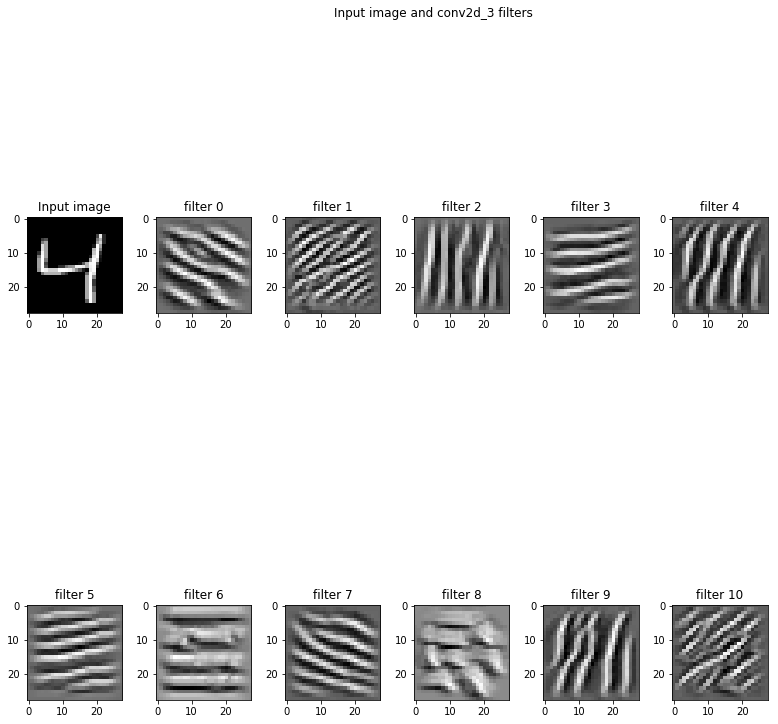

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_3'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()